<a href="https://colab.research.google.com/github/INCREDIBLE-AURNOB/Sentiment-analysis/blob/main/Sentiment_analysis_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets --quiet

In [2]:
import opendatasets as od

In [3]:
dataset='https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews'

In [4]:

od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alrafiaurnob
Your Kaggle Key: ··········


100%|██████████| 25.7M/25.7M [00:00<00:00, 179MB/s]

In [5]:
import os

In [6]:
data_dir='/content/imdb-dataset-of-50k-movie-reviews'
os.listdir(data_dir)

['IMDB Dataset.csv']

In [7]:
import pandas as pd

In [8]:
raw_df=pd.read_csv('/content/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
raw_df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


## Preprocessing

In [20]:
import numpy as np
import torch
import torch.nn as nn
import  torch.nn.functional as F
from nltk.corpus import stopwords
from collections import Counter
import string
import re
import seaborn as sns
import nltk
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset,DataLoader
from sklearn.model_selection import train_test_split

In [10]:
is_cuda=torch.cuda.is_available()

if is_cuda:
  device=torch.device("cuda")
  print("GPU is available")
else:
  device=torch.device("cpu")
  print("CPU is available")

GPU is available


In [11]:
raw_df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Spliting train and test set

In [12]:
x,y=raw_df['review'].values ,raw_df['sentiment']
x[:2],y[:2]

(array(["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due t

In [13]:

x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y)


In [14]:
x_train.shape,x_test.shape

((37500,), (12500,))

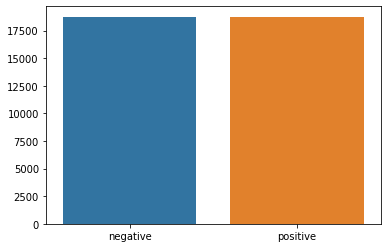

In [15]:
plot=pd.Series(y_train).value_counts()
sns.barplot(x=np.array(['negative','positive']),y=plot.values)
plt.show()

In [16]:
plot=pd.Series(y_train).value_counts(normalize=True)
plot

positive    0.5
negative    0.5
Name: sentiment, dtype: float64

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
def preprocess_string(s):
  # Remove all non-word characters
  s=re.sub(r"[^\w\s]",'',s)
  # Replace which space with no space
  s=re.sub(r"\s+",'',s)
  #Replace digit with no space
  s=re.sub(r"\d",'',s)

  return s

def tokenize(x_train,y_train,x_val,y_val):
  word_list=[]
  stop_words=set(stopwords.words('english'))
  for sent in x_train:
    for word in sent.lower().split():
      word=preprocess_string(word)
      if word not in stop_words and word !='':
        word_list.append(word)

  corpus=Counter(word_list)
  #sorting on the basis of most common words
  corpus_=sorted(corpus,key=corpus.get,reverse=True)[:1000]
  # Creating dic
  onehot_dict={w:i+1 for i,w in enumerate(corpus_)}

  #tokenize
  final_list_train,final_list_test=[],[]
  for sent in x_train:
    final_list_train.append([onehot_dict[preprocess_string(word)] for word in 
                              sent.lower().split() if preprocess_string(word)
                              in onehot_dict.keys()])
    
    for sent in x_val:
      final_list_test.append([onehot_dict[preprocess_string(word)] for word in
                              sent.lower().split() if preprocess_string(word)
                              in onehot_dict.keys()])

  encoded_train=[1 if label=='positive' else 0 for label in y_train]
  encoded_test=[1 if label=='positive' else 0 for label in y_val]
  return np.array(final_list_train),np.array(encoded_train),np.array(final_list_test),onehot_dict
  

In [ ]:
x_train,y_train,x_test,y_test,vocab=tokenize(x_train,y_train,x_test,y_test)

In [ ]:
len(vocab)